In [17]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('TSLA.csv')
df=df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


<Axes: >

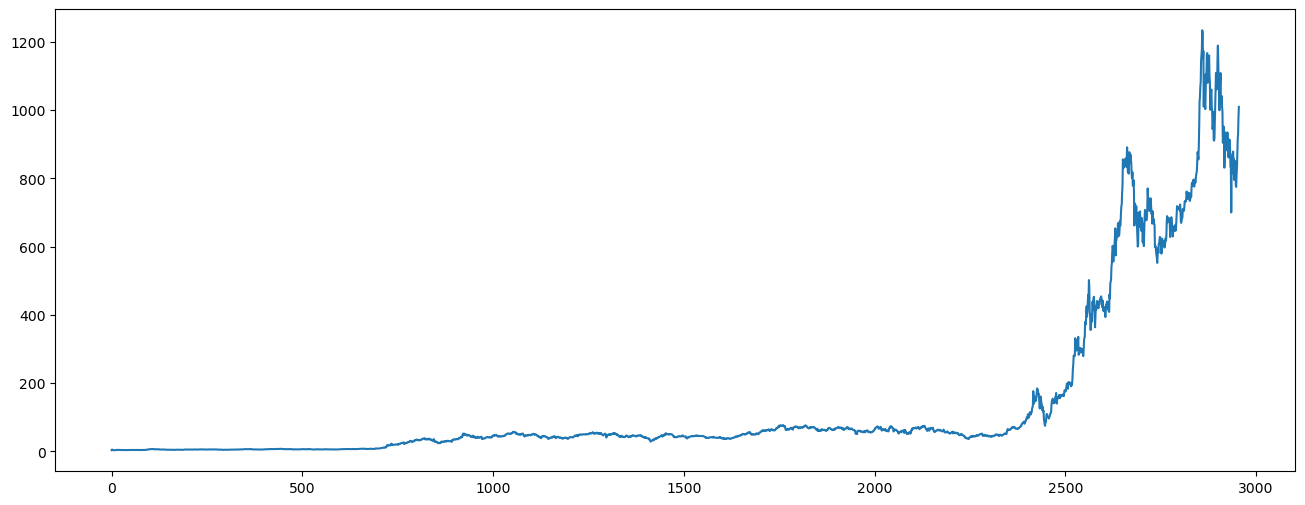

In [5]:
df['Open'].plot(figsize=(16,6))

In [7]:
X=df[['Open', 'High', 'Low', 'Volume']]
y=df[['Close']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)

(2217, 4)
(739, 4)


In [10]:
model=RandomForestRegressor()

In [11]:
model.fit(X_train, y_train)

C:\Users\abhil\AppData\Local\Temp\ipykernel_4020\180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [12]:
predicted=model.predict(X_test)

In [13]:
dfr=pd.DataFrame({'Actual Price':y_test['Close'].values.flatten(), 'Predicted Preice':predicted.flatten()})
dfr

,Actual Price,Predicted Preice
0,71.463997,73.236221
1,6.876000,6.907580
2,5.920000,5.887080
3,5.622000,5.616360
4,50.638000,50.402080
...,...,...
734,32.368000,31.558700
735,166.757996,166.380457
736,6.670000,6.814520
737,62.712002,62.666259


In [14]:
model.score(X_test, y_test)

0.9995342190434862

In [18]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.9496489430717143
Mean Squared Error: 30.971940587803306
Root Mean Squared Error: 5.565243982774098
